In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
'''1. Numerical Data Plotting

    relplot()
    scatterplot()
    lineplot()'''

'1. Numerical Data Plotting\n\n    relplot()\n    scatterplot()\n    lineplot()'

In [3]:
tips=sns.load_dataset('tips')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


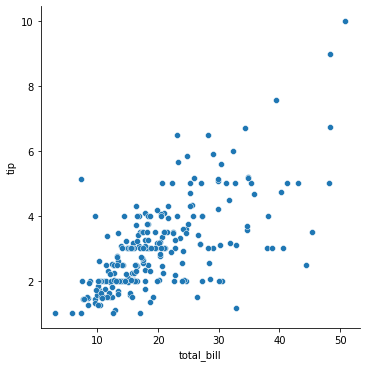

In [4]:
sns.relplot(x='total_bill',y='tip',data=tips) #Here we have used two features

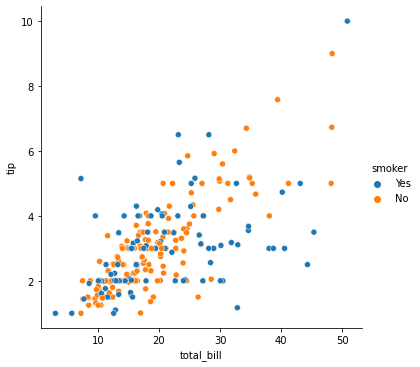

In [5]:
#Now involving 3 features using hue
sns.relplot(x='total_bill',y='tip',data=tips,hue='smoker')

In [6]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

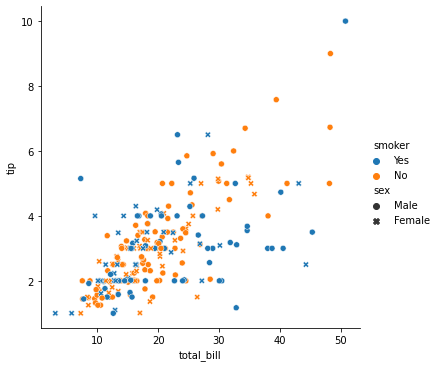

In [7]:
#We can include more features using size and style but it is not preferred as it creates a lot of confusion in the dataset
#for example .As we can see in hue we have use non categorical data.
sns.relplot(x='total_bill', y='tip',data=tips,hue='smoker',style='sex')

In [8]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

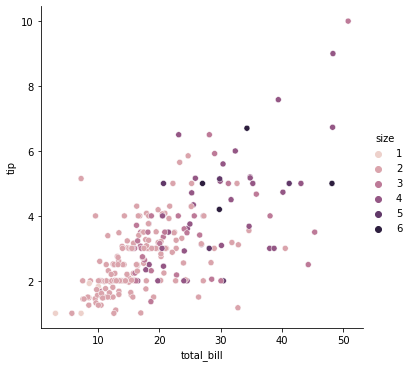

In [9]:
# Now using hue with qualitative values we see that most of the data comes in discrete values.
sns.relplot(x='total_bill',y='tip',hue='size',data=tips)

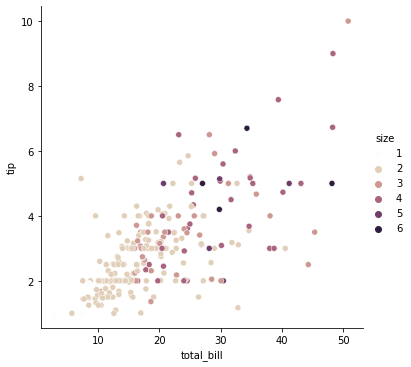

In [10]:
#we can also change the color of the circle.The graph tells that larger the number of people more is the tip we receive.Bravo!!.
sns.relplot(x='total_bill',y='tip',hue='size',data=tips,palette='ch:r=0.5,l=0.99')

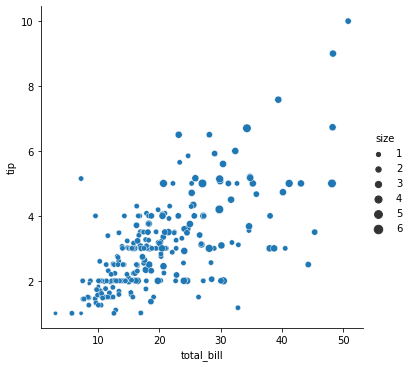

In [11]:
#Now changing the size of the circle.
sns.relplot(x='total_bill',y='tip',data=tips,size='size')

In [12]:
#hue changes the color of the plot,size changes the size of the plots whereas style changes the shape of the plot.

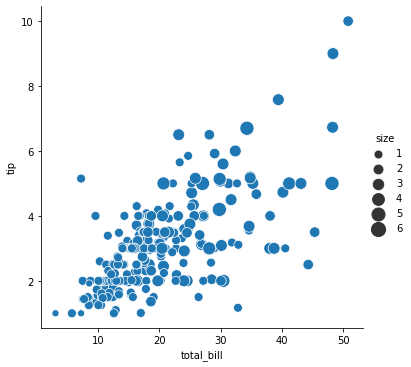

In [13]:
sns.relplot(x='total_bill',y='tip',data=tips,size='size',sizes=(50,200))

In [14]:
from numpy.random import randn

In [15]:
df=pd.DataFrame(dict(time=np.arange(500),value=randn(500).cumsum()))

In [16]:
df.head()

,time,value
0,0,0.313489
1,1,0.211416
2,2,0.244614
3,3,-1.865422
4,4,0.116865


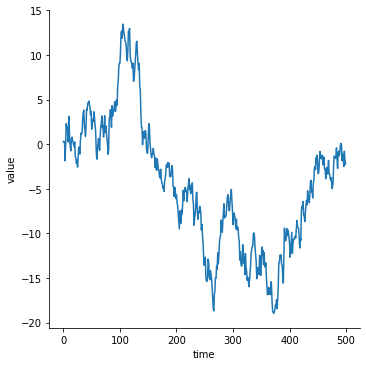

In [17]:
sns.relplot(x='time',y='value',kind='line',data=df,sort=False)
#sort = true is important as we can get a very glitchy plot.examples of which will be shown later.

In [18]:
fmri=sns.load_dataset("fmri")

In [19]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


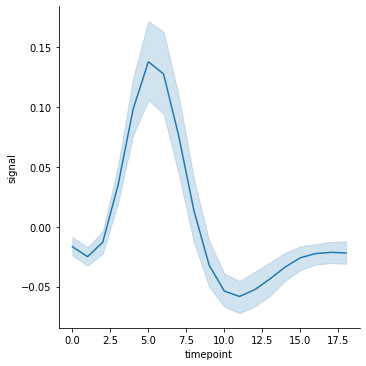

In [20]:
sns.relplot(x='timepoint',y='signal',kind='line',data=fmri)#the gap shows the confidence between the original plot.To remove this we use the ci command.

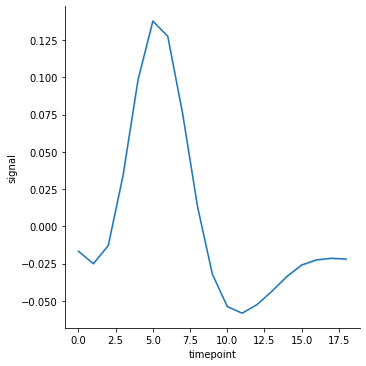

In [21]:
sns.relplot(x='timepoint',y='signal',kind='line',data=fmri,ci=False)
#put ci=sd for getting the standard deviation across each point.

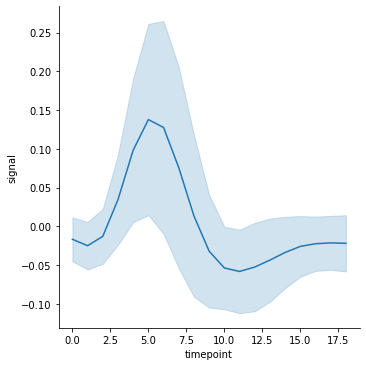

In [22]:
sns.relplot(x='timepoint',y='signal',kind='line',data=fmri,ci='sd')

In [23]:
#Now if we want data with no confidence then we will put estimator=none.We will get zigzag lines.

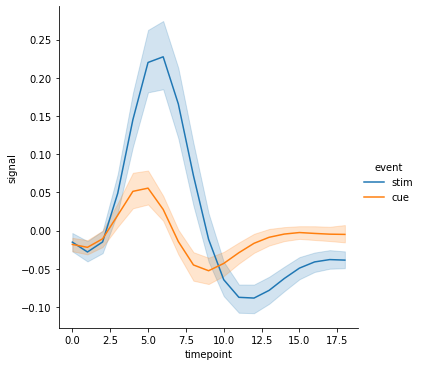

In [24]:
sns.relplot(x='timepoint',y='signal',hue='event',kind='line',data=fmri)

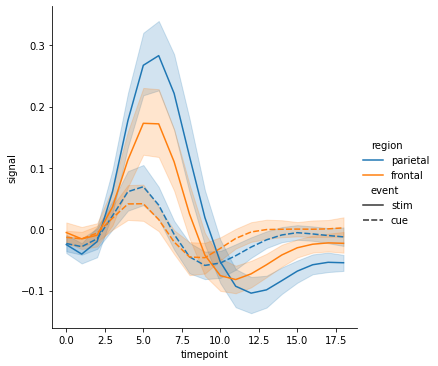

In [25]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', style = 'event', kind = 'line', data = fmri)# 4 datas using hue and style(just like previous one)

In [26]:
#We can improve the plots by placing markers on the data points by including markers = True.
# We can also remove the dash lines by including dashes = False.

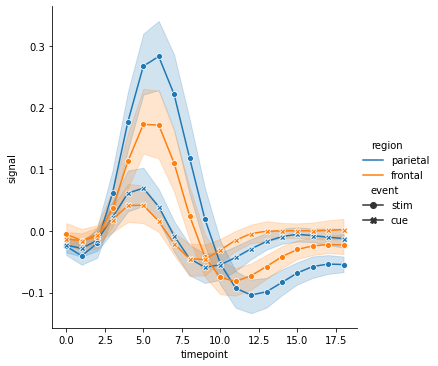

In [27]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', style = 'event', kind = 'line', data = fmri, markers = True, dashes = False)

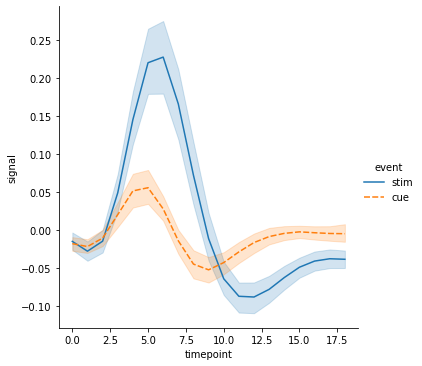

In [28]:
#We can even set hue and style to the same variable to emphasize more and make the plots more informative.
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event', style = 'event', kind = 'line', data = fmri)

In [29]:
#We can set units = subject so that each subject will have a separate line in the plot. While selecting the data we can give a condition using fmri.query().
# Here we have given the condition that the value of event should be stim.

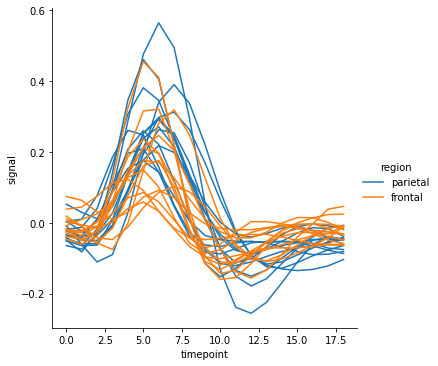

In [30]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', units = 'subject', estimator = None, kind = 'line', data = fmri.query("event == 'stim'"))

In [31]:
#Now we will see how to plot different kinds of  non-numerical data such as dates. For that, we will generate a new dataset.
# pd.date_range() returns a fixed frequency DatetimeIndex. periods specifies the number of periods to generate.

In [32]:
df = pd.DataFrame(dict(time = pd.date_range('2019-06-02', periods = 500), value = randn(500).cumsum()))
df.head()

,time,value
0,2019-06-02,0.678133
1,2019-06-03,0.454709
2,2019-06-04,1.512539
3,2019-06-05,3.137579
4,2019-06-06,1.629284


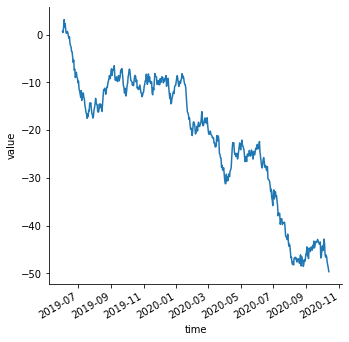

In [33]:
g = sns.relplot(x = 'time', y = 'value', kind = 'line', data = df)
g.fig.autofmt_xdate()

In [34]:
#g is an object which contains the facegrid returned by sns.replot().fig.autofmt_xdate() formats the dates.

In [35]:
#Using FacetGrid we can plot multiple plots simultaneously.
# Using col we can specify the categorical variables that will 
#determine the faceting of the grid. Here col = 'time' so we are getting two plots for lunch and dinner separately.

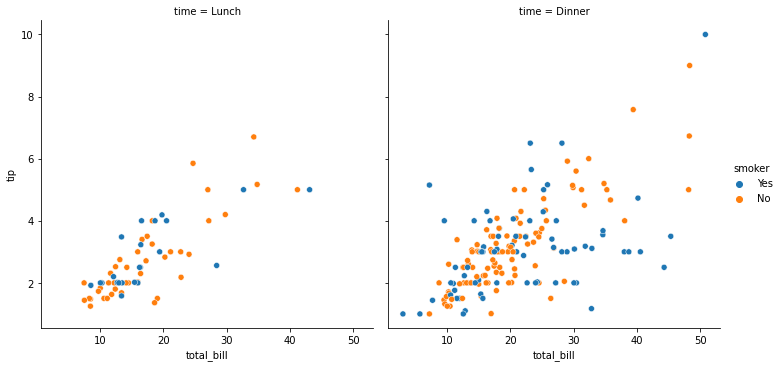

In [36]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'time', data = tips)

In [37]:
#Now we can plot a 2x2 FacetGrid using row and col. By using height we can set the height (in inches) of each facet.

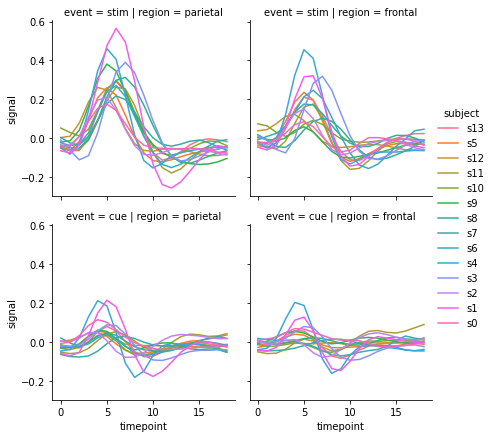

In [38]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'subject', col = 'region', row = 'event', height=3, kind = 'line', estimator = None, data = fmri)

In [39]:
#We can also plot line plots using sns.lineplot().

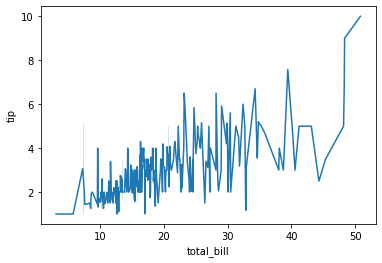

In [40]:
sns.lineplot(x = 'total_bill', y = 'tip', data = tips)

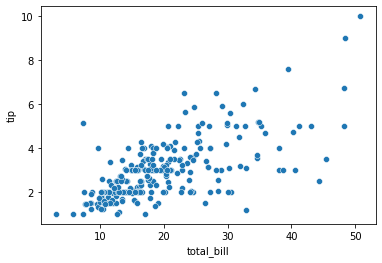

In [41]:
#We can plot scatter plots using sns.scatterplot().
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)

In [42]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [43]:
#Now we will use sns.lineplot. Here we have set ci = 68 and
# we have shown the error using bars by setting err_style='bars'.The size of confidence intervals to draw around estimated values is 68.

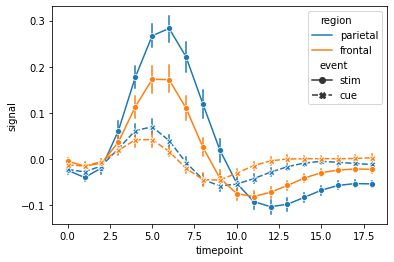

In [44]:
sns.lineplot(x = 'timepoint', y  = 'signal', style = 'event', hue = 'region', data = fmri, markers = True, ci = 68, err_style='bars')

In [45]:
#Here we have plotted subject separately and we have used a single region i.e. 'frontal'. We can specify the line weight using lw.

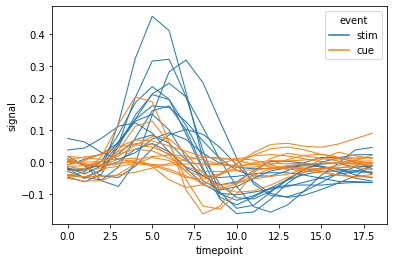

In [46]:
sns.lineplot(x = 'timepoint', y = 'signal', hue = 'event', units = 'subject', estimator = None, lw = 1, data = fmri.query("region == 'frontal'"))

In [47]:
#Now let's work with scatter plots.

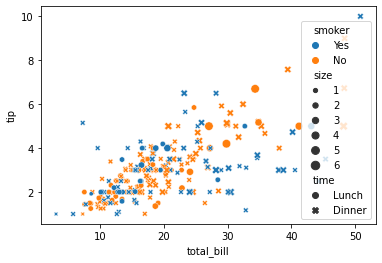

In [48]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', size = 'size', style = 'time')

In [49]:
#Now we are going to load the iris dataset.

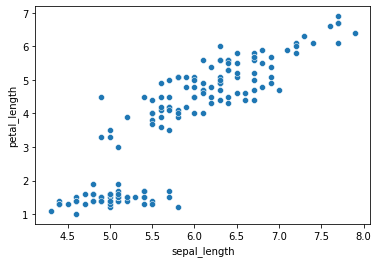

In [50]:
iris = sns.load_dataset('iris')
sns.scatterplot(x = 'sepal_length', y = 'petal_length', data = iris)

In [51]:
#Instead of passing the data = iris we can even set x and y in the way shown below.

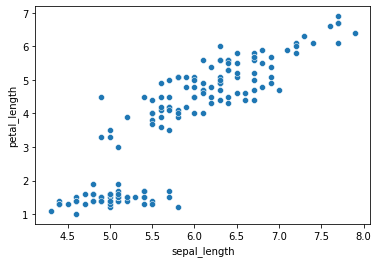

In [52]:
sns.scatterplot(x = iris['sepal_length'], y = iris['petal_length'])

In [53]:
'''2. Categorical Data Plotting

    catplot()
    boxplot()
    stripplot()
    swarmplot()
    etc…'''

'2. Categorical Data Plotting\n\n    catplot()\n    boxplot()\n    stripplot()\n    swarmplot()\n    etc…'

In [54]:
#Now we will see how to plot categorical data.

In [55]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [56]:
#Here day has categorical data and total_bill has numerical data.

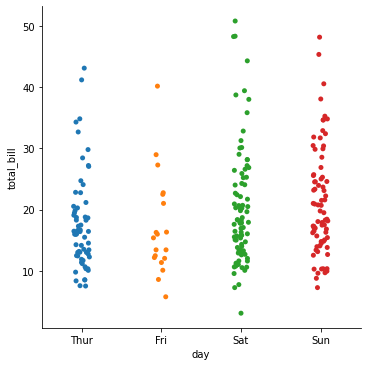

In [57]:
sns.catplot(x = 'day', y = 'total_bill', data = tips)

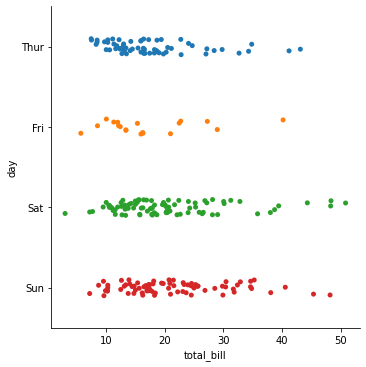

In [58]:
#We can even interchange the variables on x and y axis to get a horizontal catplot plot.
sns.catplot(y = 'day', x = 'total_bill', data = tips)

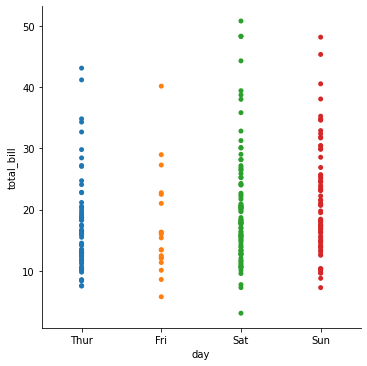

In [59]:
#The jitter parameter controls the magnitude of jitter or disables it altogether. Here we have disable the jitter.
sns.catplot(x = 'day', y = 'total_bill', data = tips, jitter = False)

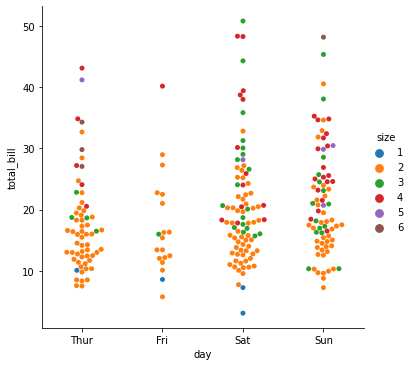

In [60]:
#In catplot() we can set the kind parameter to swarm to avoid overlap of points.
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'swarm', hue = 'size')

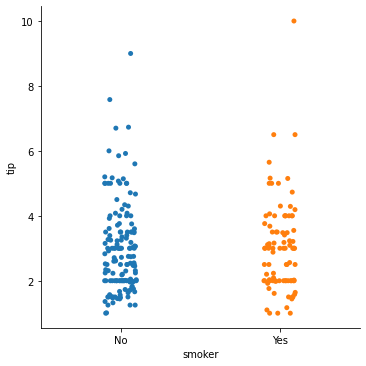

In [61]:
#We can set the order in which categorical values should be plotted using order. By default categorical levels are inferred from the data objects.
sns.catplot(x = 'smoker', y = 'tip', data = tips, order= ['No', 'Yes'])

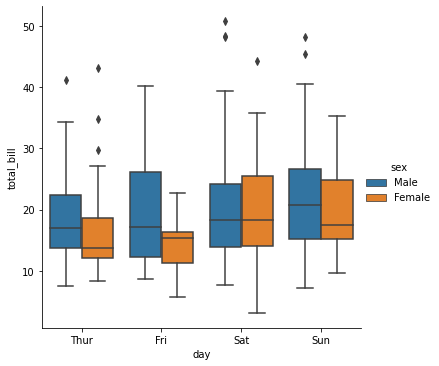

In [62]:
#If we want detailed characteristics of data we can use box plot by setting kind = 'box'.
#Box plots show the five-number summary of a set of data: including the minimum, 
#first (lower) quartile, median, third (upper) quartile, and maximum.
sns.catplot(x = 'day', y = 'total_bill', kind = 'box', data = tips, hue = 'sex')

In [63]:
#Now we will load the diamonds dataset.
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [64]:
#If you want more visualize detailed information you can use boxen plot.
 #It is similar to a box plot in plotting a nonparametric representation 
 #of a distribution in which all features correspond to actual observations. By plotting more quantiles, 
 #it provides more information about the shape of the distribution,
 #particularly in the tails. While giving the data we are sorting the data according to the colour using 
diamonds.sort_values('color')

,carat,cut,color,clarity,depth,table,price,x,y,z
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
7817,1.00,Very Good,D,SI2,63.5,59.0,4295,6.35,6.32,4.02
7816,1.00,Good,D,SI2,57.8,58.0,4295,6.61,6.55,3.80
7815,1.00,Very Good,D,SI2,61.5,63.0,4295,6.32,6.27,3.87
7809,0.56,Ideal,D,IF,61.9,57.0,4293,5.28,5.31,3.28
...,...,...,...,...,...,...,...,...,...,...
4861,1.00,Premium,J,SI1,60.8,58.0,3712,6.39,6.44,3.90
18421,1.52,Ideal,J,SI1,61.9,57.0,7491,7.37,7.33,4.55
18423,1.50,Very Good,J,VS2,62.6,58.0,7492,7.25,7.29,4.55
42108,0.65,Ideal,J,SI1,61.4,55.0,1276,5.58,5.62,3.44


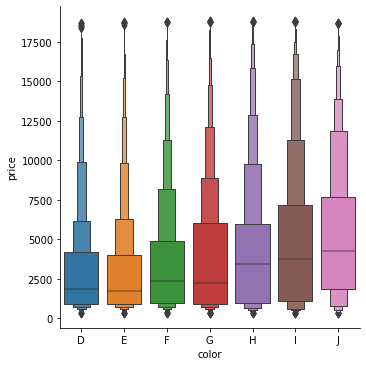

In [65]:
sns.catplot(x = 'color', y = 'price', kind = 'boxen', data = diamonds.sort_values('color'))

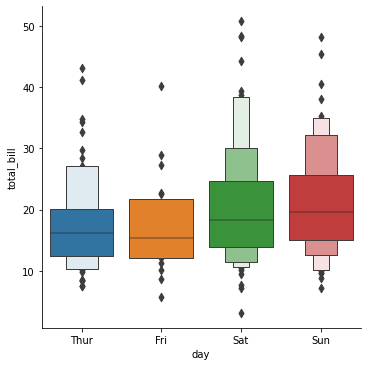

In [66]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'boxen', data = tips, dodge = False)

In [67]:
#Violin plot shows the distribution of quantitative data across several levels of one (or more) categorical
 #variables such that those distributions can be compared. Unlike a box plot, 
#in which all of the plot components correspond to actual data points,
 #the violin plot features a kernel density estimation of the underlying distribution.

In [68]:
#We can draw a violin plot by setting kind = 'violin'. When using hue nesting with a variable that takes two levels,
 #setting split to True will draw half of a violin for each level. This can make it easier to directly compare the distributions.

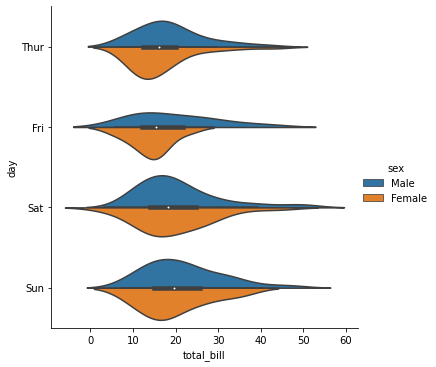

In [69]:
sns.catplot(x = 'total_bill', y = 'day', hue = 'sex', kind = 'violin', data = tips, split = True,)

In [70]:
#Now we will load the titanic dataset.

In [71]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#We will now plot a barplot. The black line represents the probability of error.

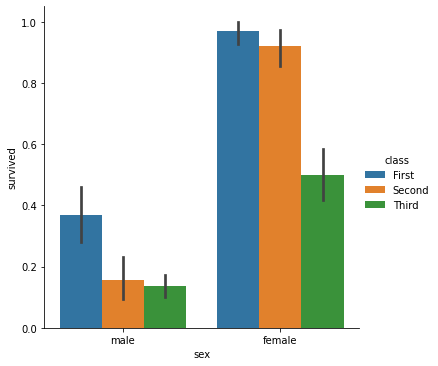

In [72]:
sns.catplot(x = 'sex', y = 'survived', hue = 'class', kind = 'bar', data = titanic)

In [73]:
#Now we will plot a count plot. We can change the gradient of the colour using palette parameter.

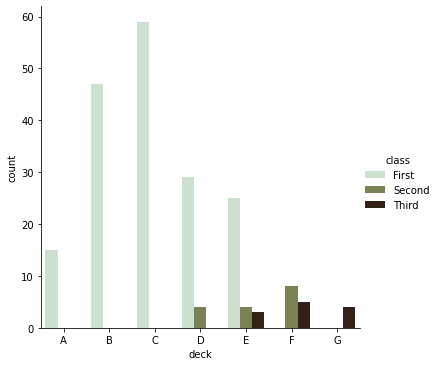

In [74]:
sns.catplot(x = 'deck', kind = 'count', palette = 'ch:0.95', data = titanic, hue = 'class')

In [ ]:
#A point plot represents an estimate of central tendency for a numeric variable 
#by the position of scatter plot points and provides some 
#indication of the uncertainty around that estimate using error bars.

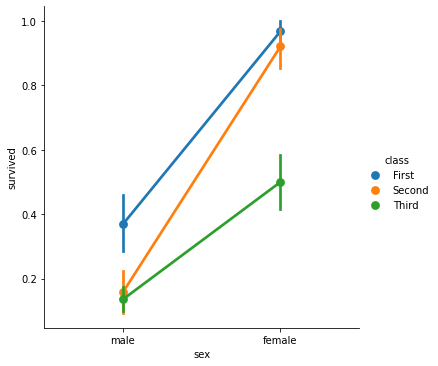

In [75]:
sns.catplot(x = 'sex', y = 'survived', hue = 'class', kind = 'point', data = titanic)

In [ ]:
#3. Visualizing Distribution of the Data

    #distplot()
    #kdeplot()
    #jointplot()
    #rugplot()

In [78]:
#Now lets plot a kdeplot.

#shade = True shades in the area under the KDE curve. 
#We can control the bandwidth using bw.
 #The parametercut draws the estimate to cut * bw from the extreme data points i.e. it cuts the plot and zooms it.


In [79]:
x = randn(100)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


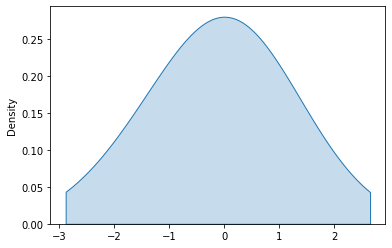

In [80]:
sns.kdeplot(x, shade=True, cbar = True, bw = 1, cut = 0)

In [81]:
#pair plot very important.Used to find the relationship between variables.

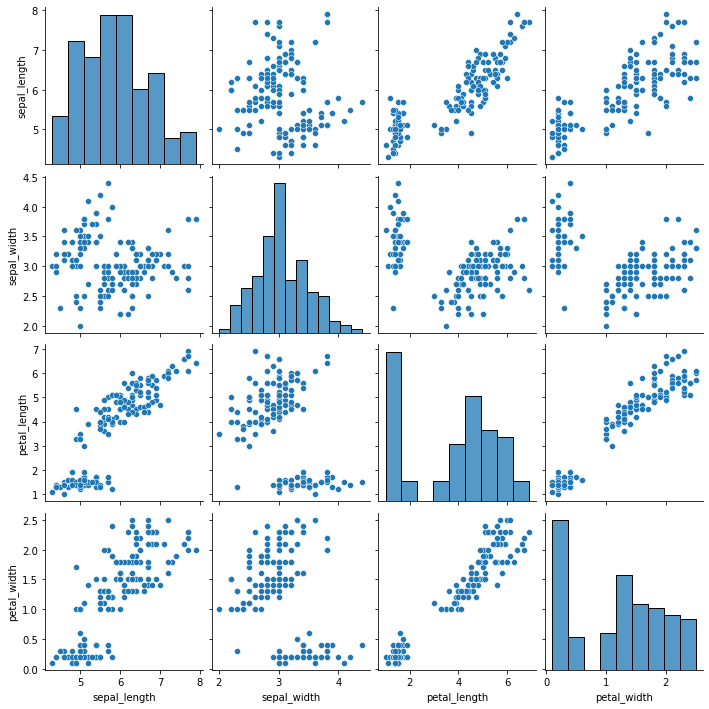

In [82]:
sns.pairplot(iris)

In [ ]:
#4. Linear Regression and Relationship

    #regplot()
    #lmplot()

In [83]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
#We can draw regression plots with the help of sns.regplot(). 
#The plot drawn below shows the relationship between total_bill and tip.

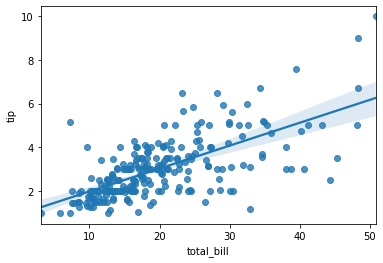

In [84]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips)

In [85]:
#We can draw a linear model plot using sns.lmplot().

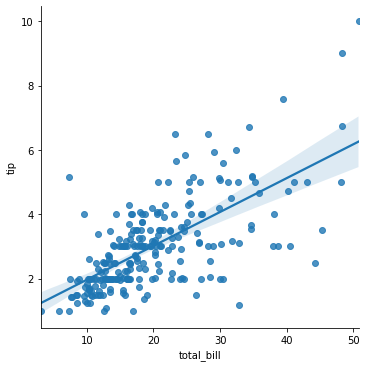

In [86]:
sns.lmplot(x = 'total_bill', y= 'tip', data = tips)

In [87]:
#We can draw a plot which shows the linear relationship between size and tips.

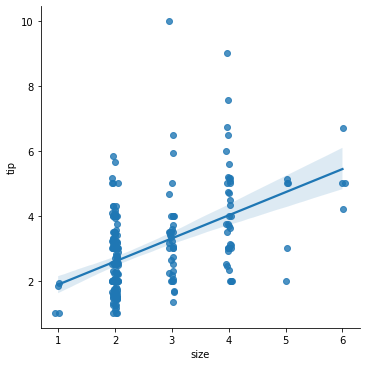

In [88]:
sns.lmplot(x = 'size', y = 'tip', data = tips, x_jitter = 0.05)

In [89]:
#If we set x_estimator = np.mean the dots in the above plot will be replaced by the mean and a confidence line.

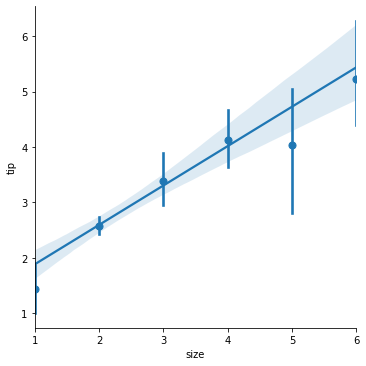

In [90]:
sns.lmplot(x = 'size', y = 'tip', data = tips, x_estimator = np.mean)

In [91]:
'''5. Controlling Plotted Figure Aesthetics

    figure styling
    axes styling
    color palettes
    etc..'''

'5. Controlling Plotted Figure Aesthetics\n\n    figure styling\n    axes styling\n    color palettes\n    etc..'

In [ ]:
#Here is a function to draw a sinplot.


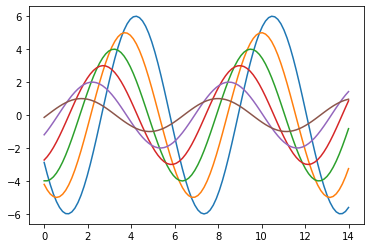

In [93]:
def sinplot(flip = 1):
    x = np.linspace(0, 14, 100)
    for i in range(1,7):
        plt.plot(x, np.sin(x+i*0.5)*(7-i)*flip)
sinplot(-1)

In [ ]:
#sns.set_style() is used to set the aesthetic style of the plots. ticks will add 
#ticks on the axes. 'axes.grid': True enables the grid in the background of the plot. 
#'xtick.direcyion': 'in' makes the ticks on the 
#x axis to point inwards.
#sns.despine() removes the top and right spines from plot. left = True removes the left spine.

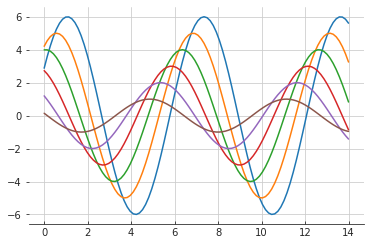

In [94]:
sns.set_style('ticks', {'axes.grid': True, 'xtick.direction': 'in'})
sinplot()
sns.despine(left = True, bottom= False)